# Predicting Categories with Naive Bayes and SVMs

## -Implementing the Naive Bayes algorithm in scikit-learn

In [1]:
# Importing the required libraries

import pandas as pd

from sklearn.model_selection import train_test_split

In [4]:
# Reading in the the dataset

df = pd.read_csv("fraud_prediction.csv")

df = df.drop(["Unnamed: 0"],axis = 1)
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_0,type_1,type_2,type_3,type_4
0,1.0,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,181.00,181.0,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,181.00,181.0,0.00,21182.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
# Creating the feautures

features = df.drop("isFraud",axis=1).values
target = df["isFraud"].values

X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=42,stratify=target)

In [6]:
# Building the Naive Bayes classifier

from sklearn.naive_bayes import GaussianNB


#Initializing an NB classifier

nb_classifier = GaussianNB()


#Fitting the classifier into the training data


nb_classifier.fit(X_train,y_train)


# Extracting the accuracy score from the NB classifier


nb_classifier.score(X_test,y_test)

0.8773518344308561

## -Support vector machines 

## - Implementing the linear support vector machine algorithm in scikit-learn

In [7]:
#Creating the training and test variables

X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=42,stratify=target)

In [9]:
#Building the linear support vector machine classifier 

from sklearn.svm import LinearSVC

#Initialiing a SVM model

svm = LinearSVC(random_state=42)

# Fitting the model to the training data

svm.fit(X_train,y_train)

#Extracting the accuracy score from the training data

svm.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.951552210724365

## - Hyperparameter optimization for the linear SVMs

### - Graphical hyperparameter optimization

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

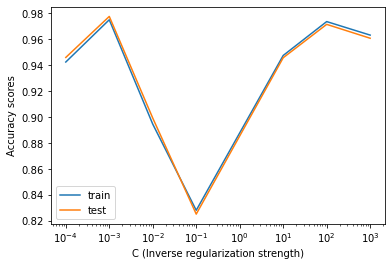

In [11]:
# In order to optimize the inverse reqularization strength, we will plot accuracy scores for the training and testing sets

import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC


training_scores = []
testing_scores = []

param_list = [0.0001,0.001,0.01,0.1,10,100,1000]

#Evaluate the training and test classification errors for each value of parameter

for param in param_list:
    # Create SVM object and fit
    
    svm = LinearSVC(C=param,random_state=42)
    svm.fit(X_train,y_train)
    
    # Evaluate the accuracy scores and append to lists
    
    training_scores.append(svm.score(X_train,y_train))
    testing_scores.append(svm.score(X_test,y_test))
    
#Plot results

plt.semilogx(param_list,training_scores,param_list,testing_scores)
plt.legend(("train","test"))
plt.ylabel("Accuracy scores")
plt.xlabel("C (Inverse regularization strength)")
plt.show()

### - Hyperparameter optimization using GridSearchCV

In [12]:
# Using GridSearchCV to optimize the inverse regularization strength

from sklearn.model_selection import GridSearchCV

#Building the model

svm = LinearSVC(random_state = 50)

#Using GridSearchCV to search for the best parameter

grid = GridSearchCV(svm,{"C":[0.00001,0.0001,0.001,0.01,0.1,10]})
grid.fit(X_train,y_train)

#print out the best parameter


print("The best value of the inverse regularization strength is:", grid.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

The best value of the inverse regularization strength is: {'C': 0.1}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


## - Scaling the data for performance improvement

In [13]:
# Scaling and standardize the data to gain improvement in the overall performance of the linear suppot vector machines

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#Setting up the scaling pipeline

order = [("scaler",StandardScaler()), ("SVM", LinearSVC(C=0.1, random_state=50))]
pipeline = Pipeline(order)

# Fitting the classifier to the scaled dataset

svm_scaled = pipeline.fit(X_train,y_train)


# Extracting the score

svm_scaled.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9971777986829727